<a href="https://colab.research.google.com/github/GhoffarFitassin/ML_2025-2026/blob/main/TG4_2341720035_Ghoffar_Abdul_Ja'far.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JS04 - Klasterisasi

## Praktikum

### Praktikum 1

In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/drive/MyDrive/Datasets/Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


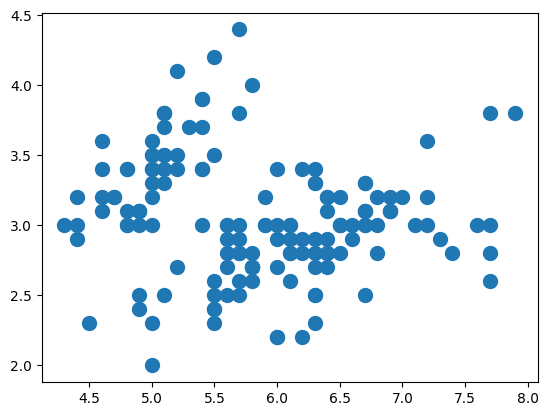

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

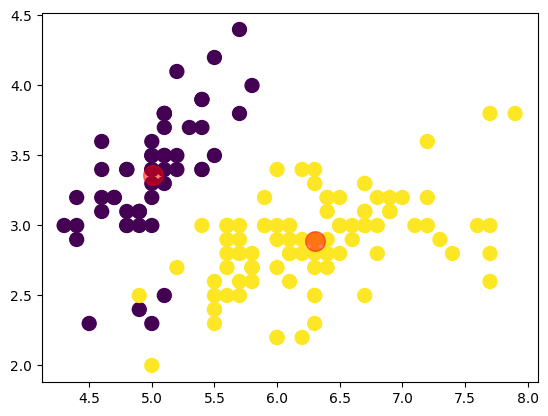

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


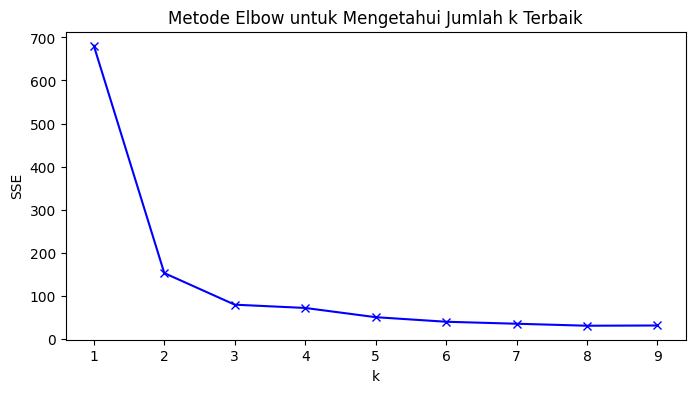

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()


In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=71.3362224245357
k=5; SSE=49.86865426388461
k=6; SSE=39.266821514027406
k=7; SSE=34.65550213675215
k=8; SSE=30.027336421037223
k=9; SSE=30.558629539098067


### Praktikum 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

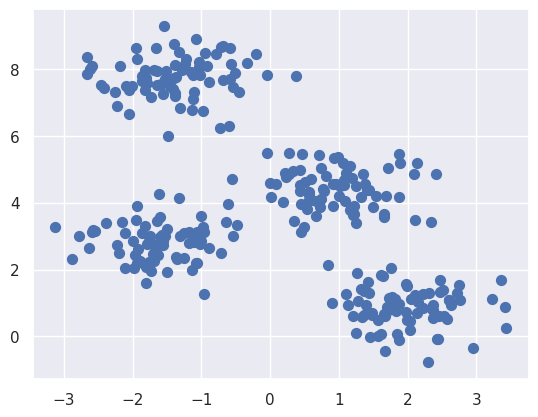

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

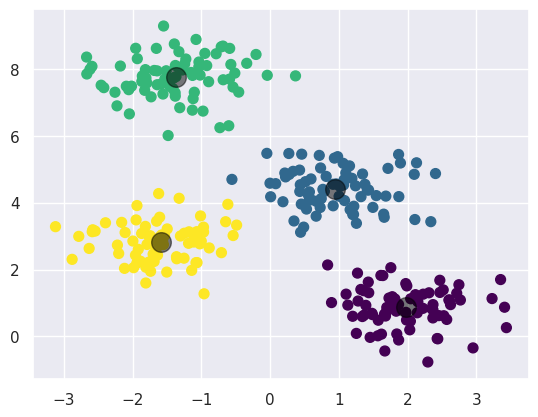

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**Algoritma Expectation-Maximization**

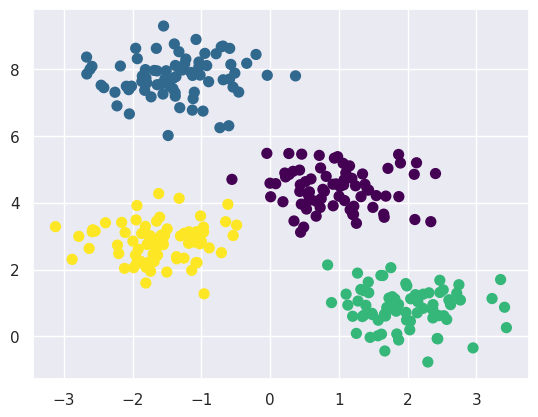

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Perubahan random**

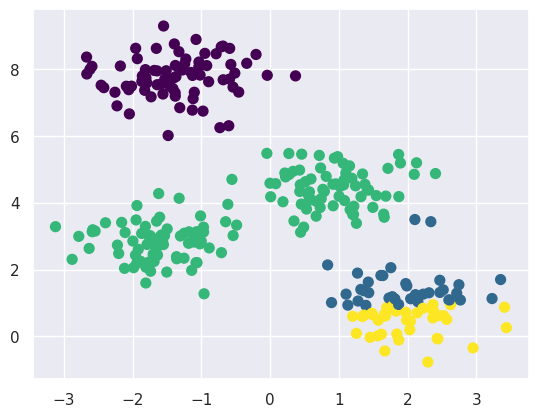

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**Optimalisasi Jumlah Klaster**

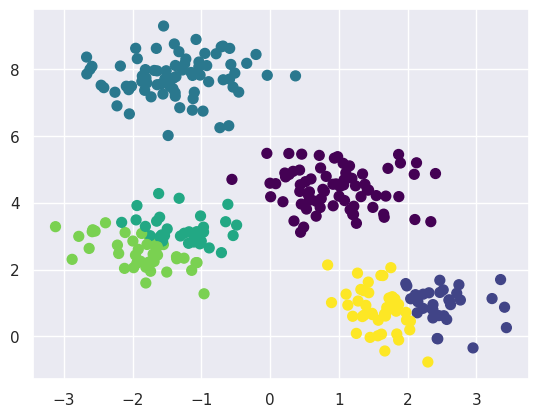

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Batas Klaster yang Tidak Selalu Linier**

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

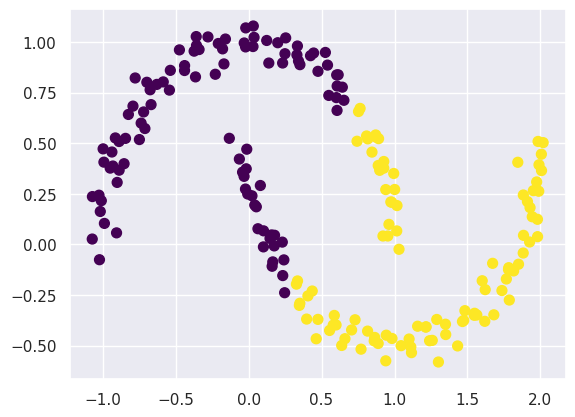

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


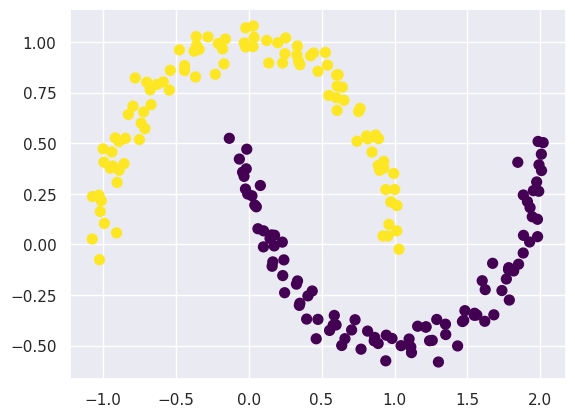

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**Contoh Kasus 1: Karakter Angka**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

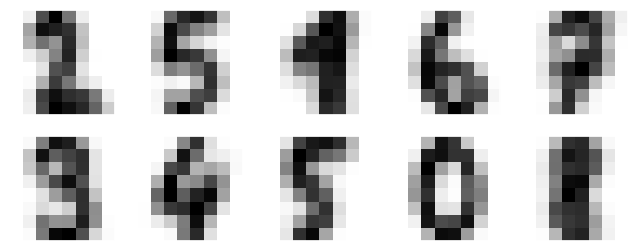

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

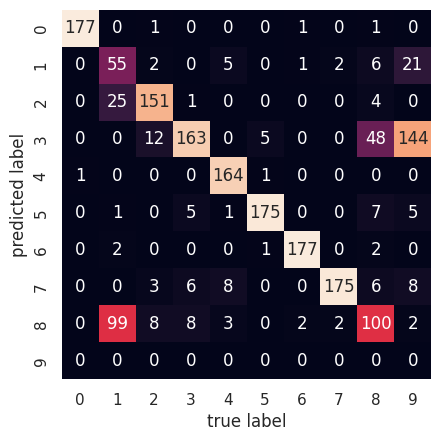

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

**Studi Kasus 2: Kompresi Citra**

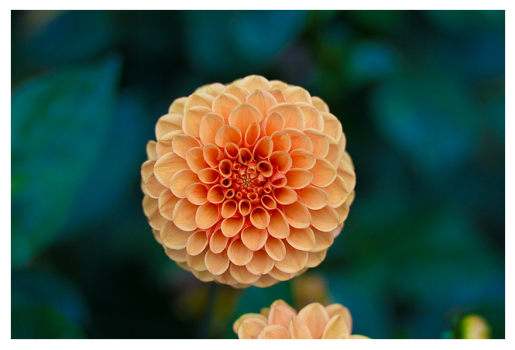

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

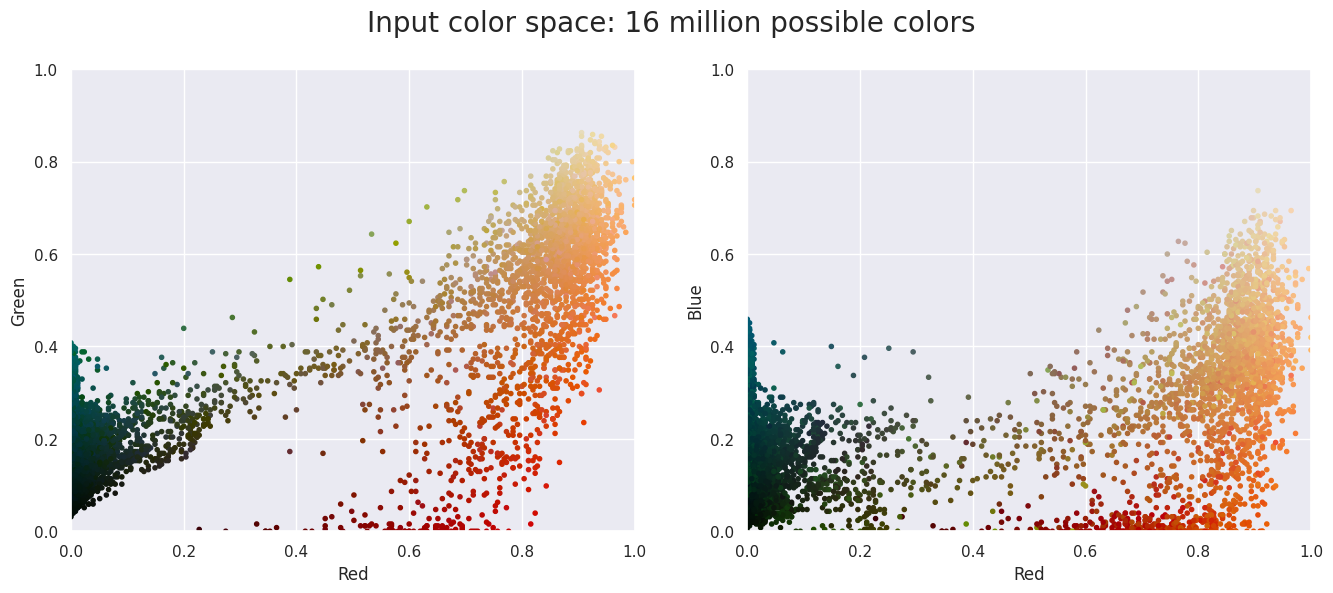

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

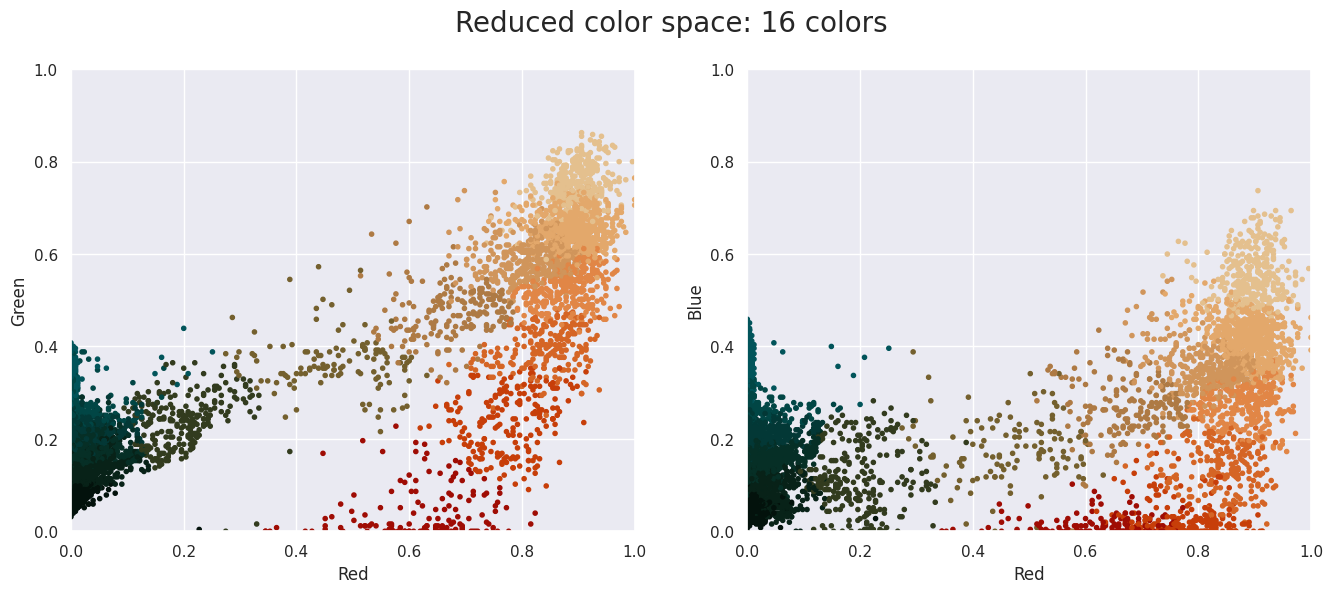

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

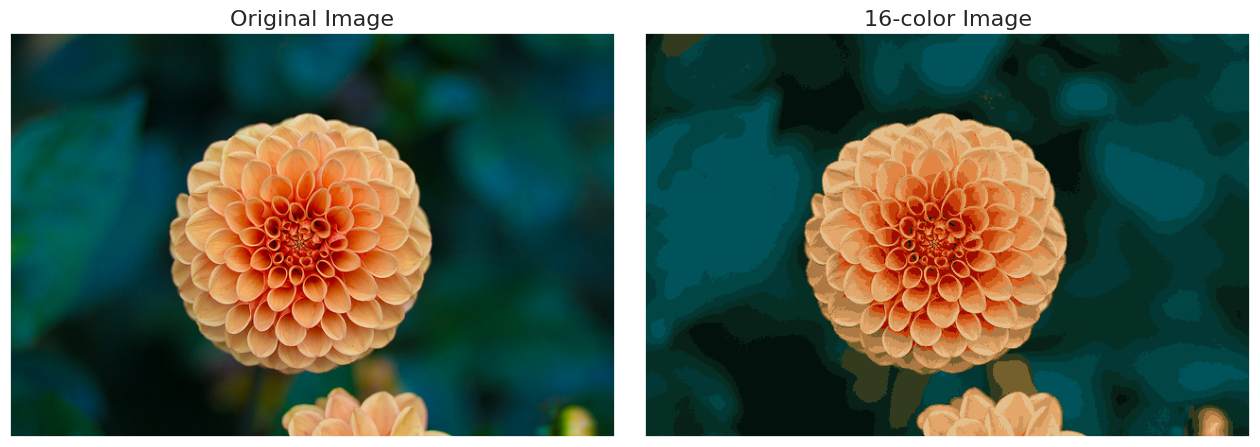

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

### Praktikum 3

**Pembuatan Dataset Sintetis**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

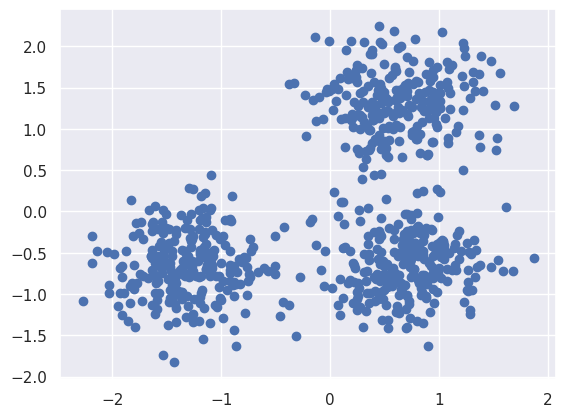

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

**Compute DBSCAN**

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


**Evaluasi Kualitas Klasterisasi**

In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


**Visualisasi Hasil Klasterisasi**

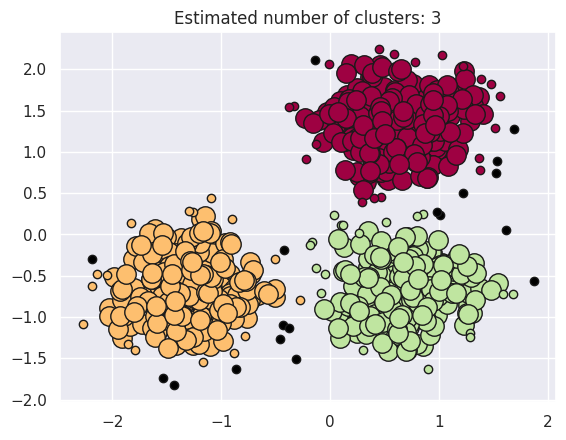

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Tugas Praktikum

### 1. Tugas K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")

1.   Gunakan data 'Mall_Customers.csv'

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


2.   Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [ ]:
# Memilih fitur 'Annual Income' dan 'Spending Score'
X_mall = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\nFitur yang akan digunakan untuk clustering:")
X_mall.head()


Fitur yang akan digunakan untuk clustering:


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


3.   Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

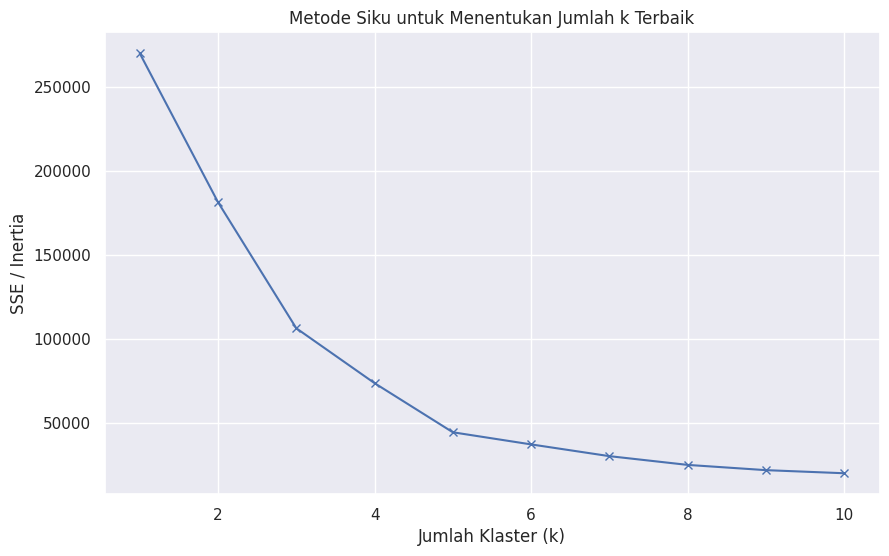

In [ ]:
# List untuk menyimpan nilai SSE (Sum of Squared Errors) atau Inertia
sse = []

# Kita akan menguji k dari 1 sampai 10
K = range(1, 11)

for k in K:
    # Membuat model KMeans untuk setiap nilai k
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeanModel.fit(X_mall)
    sse.append(kmeanModel.inertia_)

# Membuat plot Metode Siku
plt.figure(figsize=(10, 6))
plt.plot(K, sse, "bx-")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("SSE / Inertia")
plt.title("Metode Siku untuk Menentukan Jumlah k Terbaik")
plt.grid(True)
plt.show()

### 2. Tugas DBSCAN

In [107]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

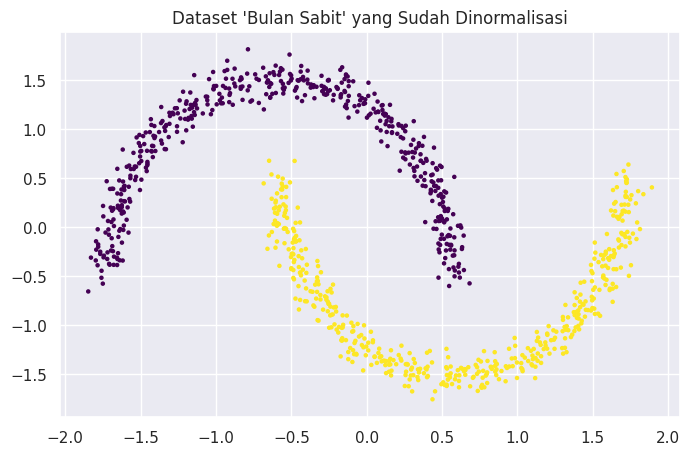

In [108]:
# 1. Membuat dataset
X_moons, y_moons_true = make_moons(n_samples=1000, noise=0.05)

# 2. Normalisasi data
X_moons_scaled = StandardScaler().fit_transform(X_moons)

# Visualisasi data awal
plt.figure(figsize=(8, 5))
plt.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=y_moons_true, cmap='viridis', s=5)
plt.title("Dataset 'Bulan Sabit' yang Sudah Dinormalisasi")
plt.show()

2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

In [109]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import *

# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.2, min_samples=5).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)

print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")


Estimasi Jumlah Klaster: 2
Estimasi Jumlah Noise: 0


3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

In [110]:
# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")


--- METRIK EVALUASI ---
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

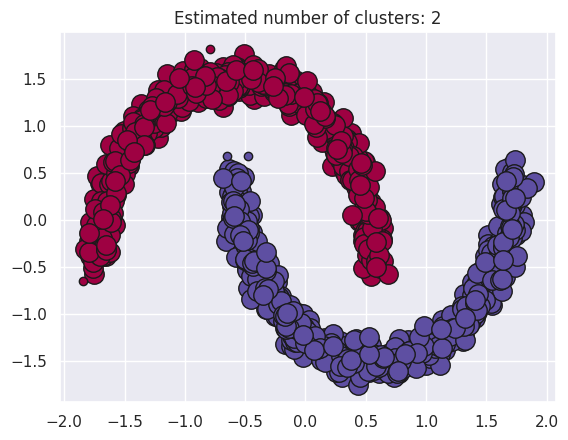

In [111]:
unique_labels = set(labels_baseline)
core_samples_mask = np.zeros_like(labels_baseline, dtype=bool)
core_samples_mask[db_baseline.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels_baseline == k

    xy = X_moons_scaled[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_moons_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_base}")
plt.show()

5. Lakukan eksperimen:
    - eps = 0.05, 0.1, 0.3, 0.5
    - min_samples = 3, 10, 20
    - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [114]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import *

# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.05, min_samples=3).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)


print("\n--- Hasil Eksperimen eps = 0.05, min_samples = 3 ---")
print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")

# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")

Estimasi Jumlah Klaster: 78
Estimasi Jumlah Noise: 188

--- METRIK EVALUASI ---
Homogeneity: 0.812
Completeness: 0.150
V-measure: 0.253
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.238
Silhouette Coefficient: 0.073


In [116]:
# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.1, min_samples=10).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)

print("\n--- Hasil Eksperimen eps = 0.1, min_samples = 10 ---")
print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")

# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")


--- Hasil Eksperimen eps = 0.1, min_samples = 10 ---
Estimasi Jumlah Klaster: 7
Estimasi Jumlah Noise: 58

--- METRIK EVALUASI ---
Homogeneity: 0.943
Completeness: 0.368
V-measure: 0.529
Adjusted Rand Index: 0.402
Adjusted Mutual Information: 0.528
Silhouette Coefficient: 0.295


In [117]:
# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.3, min_samples=20).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)

print("\n--- Hasil Eksperimen eps = 0.3, min_samples = 20 ---")
print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")

# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")


--- Hasil Eksperimen eps = 0.3, min_samples = 20 ---
Estimasi Jumlah Klaster: 2
Estimasi Jumlah Noise: 0

--- METRIK EVALUASI ---
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


In [120]:
# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.5, min_samples=20).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)

print("\n--- Hasil Eksperimen eps = 0.5, min_samples = 20 ---")
print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")

# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")


--- Hasil Eksperimen eps = 0.5, min_samples = 20 ---
Estimasi Jumlah Klaster: 2
Estimasi Jumlah Noise: 0

--- METRIK EVALUASI ---
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
